In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [15]:
df = pd.read_csv("bike_sharing.csv")

In [16]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [17]:
df.shape

(10886, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [19]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [20]:
df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [21]:
df.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [22]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [23]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [24]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [25]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [26]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:xlabel='workingday', ylabel='count'>

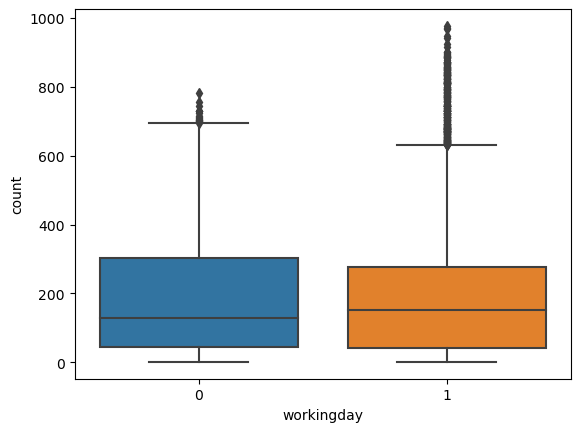

In [27]:
sns.boxplot(x='workingday',y='count',data=df)

In [28]:
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
iqr=q3-q1

In [29]:
df=df[(df['count']>(q1-1.5*iqr))&(df['count']<(q3+1.5*iqr))]

In [30]:
df.shape

(10583, 12)

In [31]:
df.workingday.value_counts()

1    7161
0    3422
Name: workingday, dtype: int64

<AxesSubplot:xlabel='workingday', ylabel='count'>

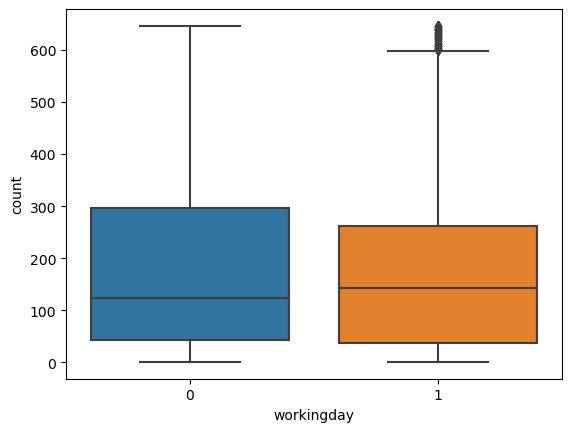

In [32]:
sns.boxplot(x='workingday',y='count',data=df)

With visual analysis we see that the count doesn't depend much on the working day

Need to check using statistical methods

The t test as compared with z test is its advantage for small sample comparison. As n increases,t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution. In other words, with large n, t test is just close to z test and one don't loose anything to continue to use t test. In the past, for convenience, we use z table when n > 30. We don't have to do it anymore. In fact, all statistical packages use t test even n is large. This is easy,convenience with computer programming, and is correct. All statistical packages are good references.

Population std is unknown

$H_0:$ The count on weekday is equal to the count on weekend.

$H_a:$ The count on weekday is greater than count on weekend.

Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

alpha = 0.05

In [65]:
weekday=df[df['workingday'] == 1]['count'].sample(3422)
weekend=df[df['workingday'] == 0]['count'].sample(3422)
print('The sample standard deviation of the count on weekday is:', round(weekday.std(),2))
print('The sample standard deviation of the count on weekend is:', round(weekend.std(),2))

The sample standard deviation of the count on weekday is: 151.24
The sample standard deviation of the count on weekend is: 163.78


In [73]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(weekday, weekend, equal_var = False, alternative='greater')
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the null hypothesis')

The p-value is 0.9878585933794152
As the p-value 0.9878585933794152 is greater than the level of significance, we accept the null hypothesis


In [74]:
df.weather.value_counts()

1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

In [75]:
df=df[~(df['weather']==4)]

In [76]:
w1 = df[df['weather'] == 1]['count'].sample(850)
w2= df[df['weather'] == 2]['count'].sample(850)
w3 = df[df['weather'] == 3]['count'].sample(850)

In [77]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


$H_0:$ The mean count in different weather are equal.

$H_a:$ The mean count in different weather are different.

This is a problem, concerning three population means. One-way ANOVA could be the appropriate
test here provided normality and equality of variance assumptions are verified.
- For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
- For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test
We will test the null hypothesis

$H_0:$ Count follows normal distribution

against the alternative hypothesis

$H_a:$ Count doesn't follow normal distribution

In [78]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro
# find the p-value
w, p_value = shapiro(df['count'].sample(4999)) 
print('The p-value is', p_value)

The p-value is 0.0


D:\programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

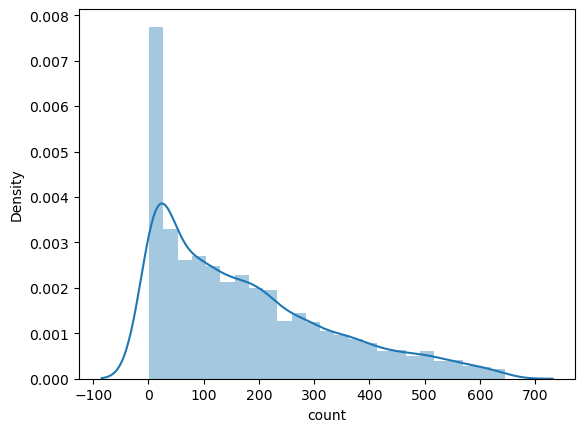

In [79]:
sns.distplot(df['count'].sample(4999))

D:\programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

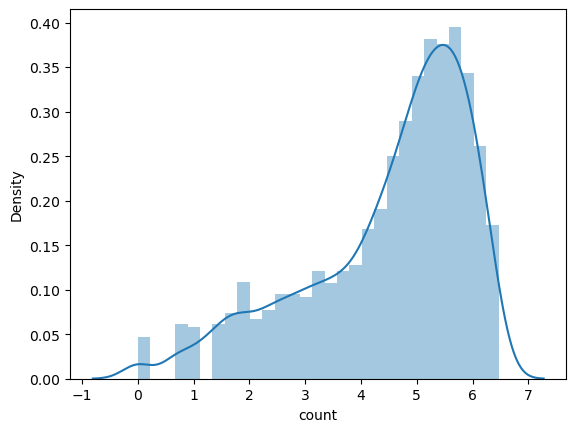

In [80]:
sns.distplot(np.log(df['count'].sample(4999)))

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk
test) but double check using visual analysis and report wherever necessary

#### Levene’s test
We will test the null hypothesis

$H_0$: All the count variances are equal

against the alternative hypothesis

$H_a$: At least one variance is different from the rest

In [85]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( w1, 
                             w2, 
                             w3)
# find the p-value
print('The p-value is', p_value)

The p-value is 3.7530807862644943e-22


In [86]:
p_value>0.05

False

In [87]:
print(w1.var(), w2.var(), w3.var())

26330.82713226632 22675.924729439474 14697.534623432397


#### ANOVA

In [90]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(w1,w2,w3)
# print the p-value
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the null hypothesis') 

The p-value is 2.168382372745956e-28
As the p-value 2.168382372745956e-28 is less than the level of significance, we reject the null hypothesis


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis.
Hence, we have enough statistical evidence to say that the mean count of rented bicycles are not
equal.

In [35]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')